# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect(r"db\Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [33]:
# TODO: Write a SQL query which will answer the question above.
#cursor.execute ("SELECT * FROM Price")

cursor.execute("""
 SELECT COUNT(productname)
FROM Products
WHERE Price < 10 ;

""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [58]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
 SELECT Country, COUNT(*) AS count
FROM Suppliers
 GROUP BY Country
    ORDER BY count DESC
""")


# TODO: Fetch your list of tuples and print it out
most_common_country = cursor.fetchall()
print("Most common country of origin:", most_common_country, "suppliers")

Most common country of origin: [('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)] suppliers


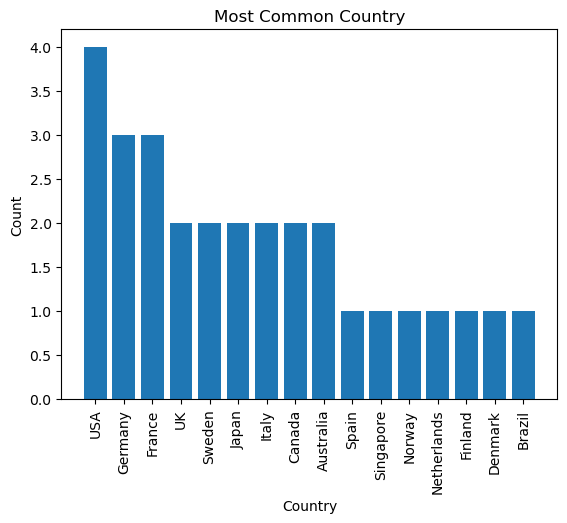

In [65]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_common_country, columns=['Country', 'count'])

# TODO: Generate a visualization on this dataframe
# 
# Data for the bar plot

# Create the bar plot
plt.bar(df['Country'], df['count'])


# Add labels and a title (optional but recommended)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Most Common Country')
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [68]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
 SELECT Country, COUNT(*) AS count
FROM Customers
 GROUP BY Country
    ORDER BY count DESC
""")


# TODO: Fetch your list of tuples and print it out
most_common_country_customer = cursor.fetchall()
print("Most common country of origin:", most_common_country_customer, "Customers")

Most common country of origin: [('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)] Customers


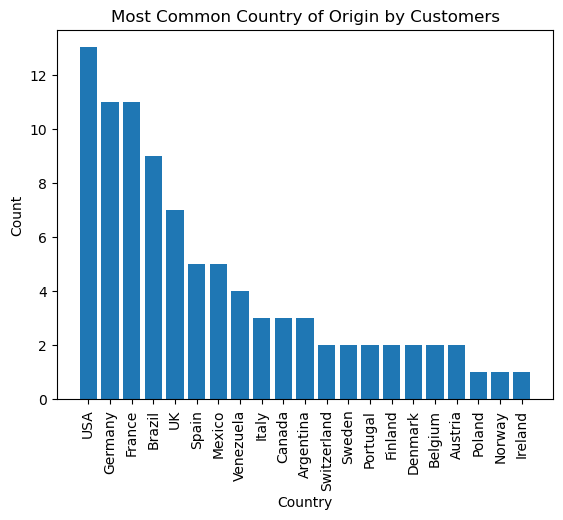

In [77]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_common_country_customer, columns=['Country', 'Count'])
#On OrderDetails.ProductID = Products.ProductID

# TODO: Generate a visualization on this dataframe
plt.bar(df['Country'], df['Count'])


# Add labels and a title (optional but recommended)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Most Common Country of Origin by Customers')
plt.xticks(rotation=90)
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [108]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
 SELECT 
    OrderDetails.ProductID,
    OrderDetails.Quantity,
    Products.ProductName,
    Products.Unit
FROM OrderDetails
LEFT JOIN Products ON OrderDetails.ProductID = Products.ProductID
ORDER BY Products.Price ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
least_popular_products = cursor.fetchall()
print("Least Popular Products", least_popular_products, "Products")

Least Popular Products [(33, 25, 'Geitost', '500 g'), (33, 60, 'Geitost', '500 g'), (33, 24, 'Geitost', '500 g'), (33, 20, 'Geitost', '500 g'), (33, 8, 'Geitost', '500 g'), (33, 60, 'Geitost', '500 g'), (33, 49, 'Geitost', '500 g'), (33, 50, 'Geitost', '500 g'), (33, 20, 'Geitost', '500 g'), (24, 15, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 28, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 12, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 12, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 6, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 10, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 10, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 25, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 10, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 15, 'Guaraná Fantástica', '12 - 355 ml cans'), (24, 15, 'Guaraná Fantástica', '12 - 355 ml cans')] Products


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

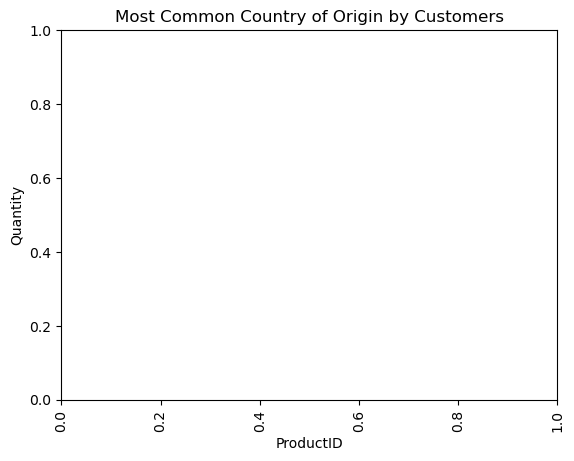

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(least_popular_products, columns=['ProductID', 'Quantity', 'ProductsName', 'Unit'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Most Common Country of Origin by Customers')
plt.xticks(rotation=90)
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]